In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

In [2]:
# Ruta al archivo CSV
archivo_csv = '../datasets/all-countries/instagram_data_all-countries.csv'

df = pd.read_csv(archivo_csv)

In [3]:
df

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH
0,1,Cristiano Ronaldo @cristiano,625.1M,0.01%,Portugal,Finance Soccer,187.5M
1,2,Leo Messi @leomessi,501.1M,0.01%,Argentina,Sports Soccer Activity General General Interest,150.3M
2,3,Selena Gomez @selenagomez,429.7M,1.09%,United States,Beauty and Self Care Entertainment and Music M...,128.9M
3,4,Kylie @kyliejenner,400.5M,-,United States,Beauty and Self Care Product Showcase Modeling...,120.1M
4,5,Dwayne Johnson @therock,397.8M,0.13%,United States,Entertainment and Music Actors Public Figure,119.3M
...,...,...,...,...,...,...,...
95,96,Sunny Leone @sunnyleone,55.3M,0.27%,India,Beauty and Self Care Modeling Actors Actor,16.6M
96,97,Burak Özdemir @cznburak,54.6M,0.03%,Turkey,Food Music Chef,16.4M
97,98,Larissa Manoela @larissamanoela,54.3M,0.21%,Brazil,Art Acting and Drama Fashion and Accessories E...,16.3M
98,99,HUDA BEAUTY @hudabeauty,54.1M,0.05%,United Arab Emirates,Beauty and Self Care Blogger Creators & Celebr...,16.2M


In [4]:
#función para convertir "K" (miles) y "M" (millones) a números decimales
def convertir_a_decimal(valor):
    if isinstance(valor, str):
        if 'M' in valor:
            return float(valor.replace('M', '')) * 1_000_000
        elif 'K' in valor:
            return float(valor.replace('K', '')) * 1_000
    return float(valor)

# Suponiendo que df ya tiene las columnas cargadas
# Aplicar la función a las columnas 'FOLLOWERS' y 'POTENTIAL REACH'
df['FOLLOWERS'] = df['FOLLOWERS'].apply(convertir_a_decimal)
df['POTENTIAL REACH'] = df['POTENTIAL REACH'].apply(convertir_a_decimal)

In [5]:
df

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH
0,1,Cristiano Ronaldo @cristiano,625100000.0,0.01%,Portugal,Finance Soccer,187500000.0
1,2,Leo Messi @leomessi,501100000.0,0.01%,Argentina,Sports Soccer Activity General General Interest,150300000.0
2,3,Selena Gomez @selenagomez,429700000.0,1.09%,United States,Beauty and Self Care Entertainment and Music M...,128900000.0
3,4,Kylie @kyliejenner,400500000.0,-,United States,Beauty and Self Care Product Showcase Modeling...,120100000.0
4,5,Dwayne Johnson @therock,397800000.0,0.13%,United States,Entertainment and Music Actors Public Figure,119300000.0
...,...,...,...,...,...,...,...
95,96,Sunny Leone @sunnyleone,55300000.0,0.27%,India,Beauty and Self Care Modeling Actors Actor,16600000.0
96,97,Burak Özdemir @cznburak,54600000.0,0.03%,Turkey,Food Music Chef,16400000.0
97,98,Larissa Manoela @larissamanoela,54300000.0,0.21%,Brazil,Art Acting and Drama Fashion and Accessories E...,16300000.0
98,99,HUDA BEAUTY @hudabeauty,54100000.0,0.05%,United Arab Emirates,Beauty and Self Care Blogger Creators & Celebr...,16200000.0


In [6]:
# Función para convertir porcentajes a decimales
def convertir_porcentaje_a_decimal(valor):
    if isinstance(valor, str) and '%' in valor:
        # Eliminar el símbolo de porcentaje y convertir a decimal
        return float(valor.replace('%', '')) / 100
    return valor

# Aplicar la conversión a la columna ER
df['ER'] = df['ER'].apply(convertir_porcentaje_a_decimal)


In [7]:
df

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH
0,1,Cristiano Ronaldo @cristiano,625100000.0,0.0001,Portugal,Finance Soccer,187500000.0
1,2,Leo Messi @leomessi,501100000.0,0.0001,Argentina,Sports Soccer Activity General General Interest,150300000.0
2,3,Selena Gomez @selenagomez,429700000.0,0.0109,United States,Beauty and Self Care Entertainment and Music M...,128900000.0
3,4,Kylie @kyliejenner,400500000.0,-,United States,Beauty and Self Care Product Showcase Modeling...,120100000.0
4,5,Dwayne Johnson @therock,397800000.0,0.0013,United States,Entertainment and Music Actors Public Figure,119300000.0
...,...,...,...,...,...,...,...
95,96,Sunny Leone @sunnyleone,55300000.0,0.0027,India,Beauty and Self Care Modeling Actors Actor,16600000.0
96,97,Burak Özdemir @cznburak,54600000.0,0.0003,Turkey,Food Music Chef,16400000.0
97,98,Larissa Manoela @larissamanoela,54300000.0,0.0021,Brazil,Art Acting and Drama Fashion and Accessories E...,16300000.0
98,99,HUDA BEAUTY @hudabeauty,54100000.0,0.0005,United Arab Emirates,Beauty and Self Care Blogger Creators & Celebr...,16200000.0


In [8]:
# Unir todas las cadenas de texto de la columna 'TOPIC OF INFLUENCE' en un solo texto grande
texto_completo = ' '.join(df['TOPIC OF INFLUENCE'].dropna().astype(str))

# Limpiar el texto: eliminar caracteres especiales y convertir a minúsculas
texto_completo = re.sub(r'[^\w\s]', '', texto_completo).lower()

# Contar la frecuencia de cada palabra
contador_palabras = Counter(texto_completo.split())

# Opcional: si quieres eliminar palabras comunes o irrelevantes (stopwords), puedes hacer algo así:
stopwords = set(["and"])  # Agrega más según sea necesario
contador_palabras = {palabra: count for palabra, count in contador_palabras.items() if palabra not in stopwords}

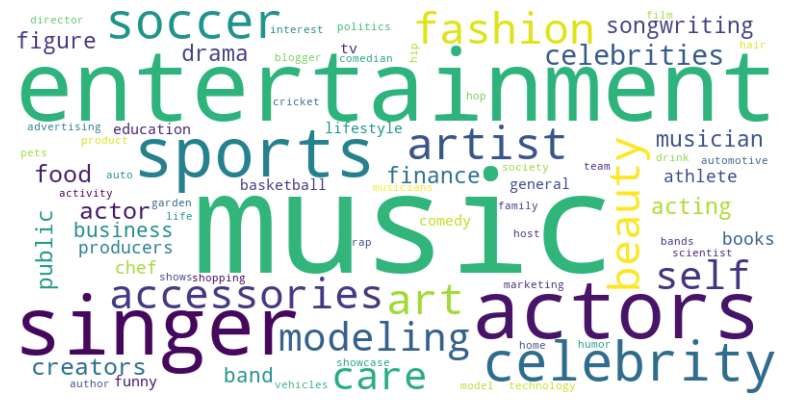

In [9]:
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(contador_palabras)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eliminar los ejes
plt.show()

In [10]:
df

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH
0,1,Cristiano Ronaldo @cristiano,625100000.0,0.0001,Portugal,Finance Soccer,187500000.0
1,2,Leo Messi @leomessi,501100000.0,0.0001,Argentina,Sports Soccer Activity General General Interest,150300000.0
2,3,Selena Gomez @selenagomez,429700000.0,0.0109,United States,Beauty and Self Care Entertainment and Music M...,128900000.0
3,4,Kylie @kyliejenner,400500000.0,-,United States,Beauty and Self Care Product Showcase Modeling...,120100000.0
4,5,Dwayne Johnson @therock,397800000.0,0.0013,United States,Entertainment and Music Actors Public Figure,119300000.0
...,...,...,...,...,...,...,...
95,96,Sunny Leone @sunnyleone,55300000.0,0.0027,India,Beauty and Self Care Modeling Actors Actor,16600000.0
96,97,Burak Özdemir @cznburak,54600000.0,0.0003,Turkey,Food Music Chef,16400000.0
97,98,Larissa Manoela @larissamanoela,54300000.0,0.0021,Brazil,Art Acting and Drama Fashion and Accessories E...,16300000.0
98,99,HUDA BEAUTY @hudabeauty,54100000.0,0.0005,United Arab Emirates,Beauty and Self Care Blogger Creators & Celebr...,16200000.0


In [11]:
# Separar el campo 'TOPIC OF INFLUENCE' en varias columnas usando el delimitador '&'
df_categorias = df['TOPIC OF INFLUENCE'].str.split('and', expand=True)

# Generar nombres dinámicamente para cada columna generada
df_categorias.columns = [f'TOPIC_OF_INFLUENCE_{i+1}' for i in range(df_categorias.shape[1])]

# Unir estas nuevas columnas con el DataFrame original
df = pd.concat([df, df_categorias], axis=1)

In [12]:
# Contar los valores nulos en la columna 'TOPIC OF INFLUENCE'
nulos = df['COUNTRY'].isna().sum()
print(nulos)

20


In [13]:
df

,#,NAME,FOLLOWERS,ER,COUNTRY,TOPIC OF INFLUENCE,POTENTIAL REACH,TOPIC_OF_INFLUENCE_1,TOPIC_OF_INFLUENCE_2,TOPIC_OF_INFLUENCE_3,TOPIC_OF_INFLUENCE_4
0,1,Cristiano Ronaldo @cristiano,625100000.0,0.0001,Portugal,Finance Soccer,187500000.0,Finance Soccer,None,None,None
1,2,Leo Messi @leomessi,501100000.0,0.0001,Argentina,Sports Soccer Activity General General Interest,150300000.0,Sports Soccer Activity General General Interest,None,None,None
2,3,Selena Gomez @selenagomez,429700000.0,0.0109,United States,Beauty and Self Care Entertainment and Music M...,128900000.0,Beauty,Self Care Entertainment,Music Music Actors,None
3,4,Kylie @kyliejenner,400500000.0,-,United States,Beauty and Self Care Product Showcase Modeling...,120100000.0,Beauty,Self Care Product Showcase Modeling Public Fi...,None,None
4,5,Dwayne Johnson @therock,397800000.0,0.0013,United States,Entertainment and Music Actors Public Figure,119300000.0,Entertainment,Music Actors Public Figure,None,None
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Sunny Leone @sunnyleone,55300000.0,0.0027,India,Beauty and Self Care Modeling Actors Actor,16600000.0,Beauty,Self Care Modeling Actors Actor,None,None
96,97,Burak Özdemir @cznburak,54600000.0,0.0003,Turkey,Food Music Chef,16400000.0,Food Music Chef,None,None,None
97,98,Larissa Manoela @larissamanoela,54300000.0,0.0021,Brazil,Art Acting and Drama Fashion and Accessories E...,16300000.0,Art Acting,Drama Fashion,Accessories Entertainment,Music
98,99,HUDA BEAUTY @hudabeauty,54100000.0,0.0005,United Arab Emirates,Beauty and Self Care Blogger Creators & Celebr...,16200000.0,Beauty,Self Care Blogger Creators & Celebrities,None,None
